In [1]:
# @title Завантаження пакетів { vertical-output: true }
from scipy.optimize import curve_fit
import pandas as pd
import numpy as np
from ipywidgets import interact
from matplotlib import pyplot as plt
from io import StringIO
# @title Викликаємо пакет методу найменших повних квадратів (ODR)
from scipy.odr import ODR, Model, RealData
from google.colab import files


# Новый раздел

Дані

In [ ]:
table = """
1.12  10.95  5e-3
1.06  10.96  5e-3
1     10.97  5e-3
0.87  10.97  5e-3
0.75  10.98  5e-3
0.62  10.99  5e-3
0.5   11     5e-3
"""

In [ ]:
df = np.loadtxt(StringIO(table))
df = pd.DataFrame(df, columns=["I","U","dU"])


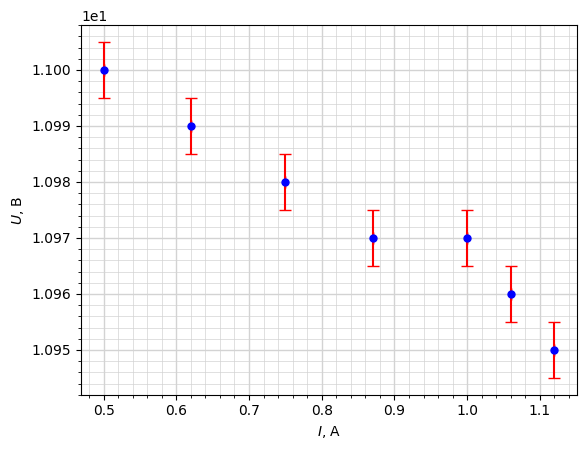

In [ ]:
I = df.I
U = df.U
dU = df.dU
plt.errorbar(I, U, xerr=0, yerr=dU,
             fmt='o', ecolor='r', color='b',
             markersize=5, capsize=4)
plt.xlabel(r'$I$, A')
plt.ylabel(r'$U$, B')
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))

plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth=1.0, color='lightgray')  # Мажорна сітка
plt.grid(which='minor', linestyle='-', linewidth=0.5, color='lightgray')  # Мінорна сітка
plt.show()

$U = U_0 - IR_i ⇒ y = \beta_0 - \beta_1 \cdot x$

In [ ]:
# Задаємо модельну функцію
def model_func(beta, x):
    y =  beta[0] - x * beta[1]
    return y

In [ ]:
model = Model(model_func)

data = RealData(I, U)

# Створюємо ODR зі своїми даними, моделлю та початковою оцінкою параметрів
odr = ODR(data, model, [0, 0])

# Вибір методу підгонки
odr.set_job(fit_type=0)
output = odr.run()

In [ ]:
U0 = output.beta[0]
dU0 =  output.sd_beta[0]
Ri = output.beta[1]
dRi =  output.sd_beta[1]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

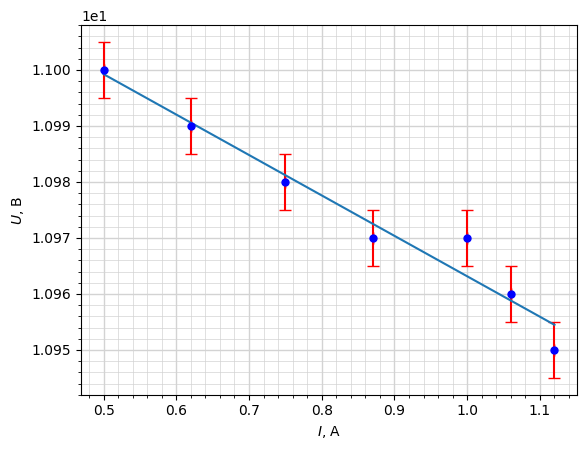

In [ ]:
plt.errorbar(I, U, xerr=0, yerr=dU,
             fmt='o', ecolor='r', color='b',
             markersize=5, capsize=4)
plt.plot(I, model_func(output.beta, I))
plt.xlabel(r'$I$, A')
plt.ylabel(r'$U$, B')
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))

plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth=1.0, color='lightgray')  # Мажорна сітка
plt.grid(which='minor', linestyle='-', linewidth=0.5, color='lightgray')  # Мінорна сітка




plt.savefig("abc.pdf")
files.download("abc.pdf")

plt.show()

In [ ]:
print(fr'U_0 = {U0:.3f} +/- {dU0:.3f} В')
print(fr'R_i = {Ri:.3f} +/- {dRi:.3f} Ом')

U_0 = 11.035 +/- 0.006 В
R_i = 0.072 +/- 0.007 Ом
